In [4]:

from langchain.llms import Ollama

In [5]:
model=Ollama(model='crewai-gemma2')

C:\Users\vivek\AppData\Local\Temp\ipykernel_52292\3116929097.py:1: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  model=Ollama(model='crewai-gemma2')


In [6]:
model.invoke('what is ai')

'AI<end_of_turn> is a natural language processing (NLP) task that involves using artificial intelligence to generate or understand human-like language.'

In [7]:
import litellm

try:
    response = litellm.completion(
        model="ollama/crewai-gemma2",
        api_base="http://localhost:11434",
        provider="Ollama"
    )
except litellm.exceptions.BadRequestError as e:
    print("Bad Request Error: Check your model parameters or API setup.")
    print(f"Details: {e}")
except litellm.exceptions.LLMProviderError as e:
    print("LLM Provider Error: There is an issue with the provider configuration.")
    print(f"Details: {e}")
    

AttributeError: module 'litellm.exceptions' has no attribute 'LLMProviderError'

In [8]:
from crewai_tools import SerperDevTool

tool = SerperDevTool(
    search_url="https://google.serper.dev/flights",
    n_results=2,
)

In [10]:
print(tool.run(search_query="boston"))

Using Tool: Search the internet
{'message': 'Not found', 'statusCode': 404}


In [1]:
from langchain_community.utilities import GoogleSerperAPIWrapper

In [2]:
search = GoogleSerperAPIWrapper()

In [9]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------- -------------------- 3.9/8.0 MB 29.4 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 33.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------------- ------ 1.8/2.2 MB 33.5 MB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 4.1 MB/s eta 0:00:00


Displaying images for Alcatraz_Island:


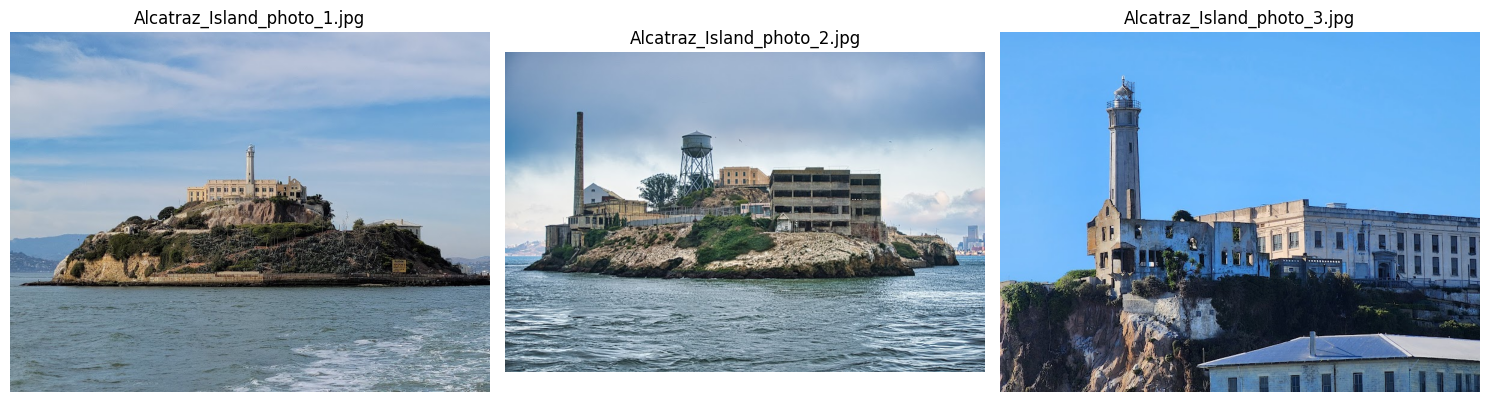

Displaying images for Fisherman’s_Wharf:


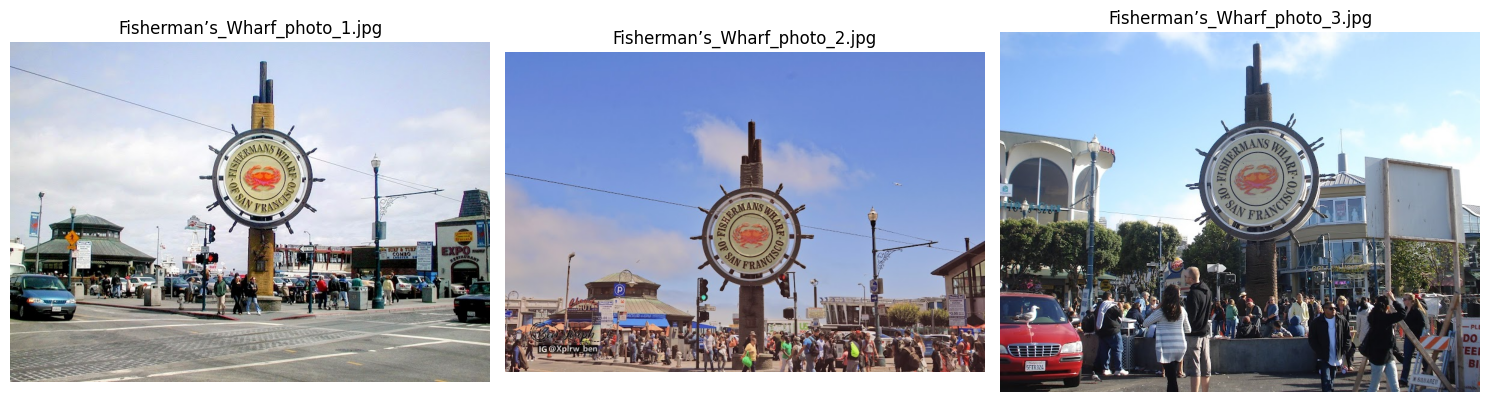

Displaying images for Los_Angeles:


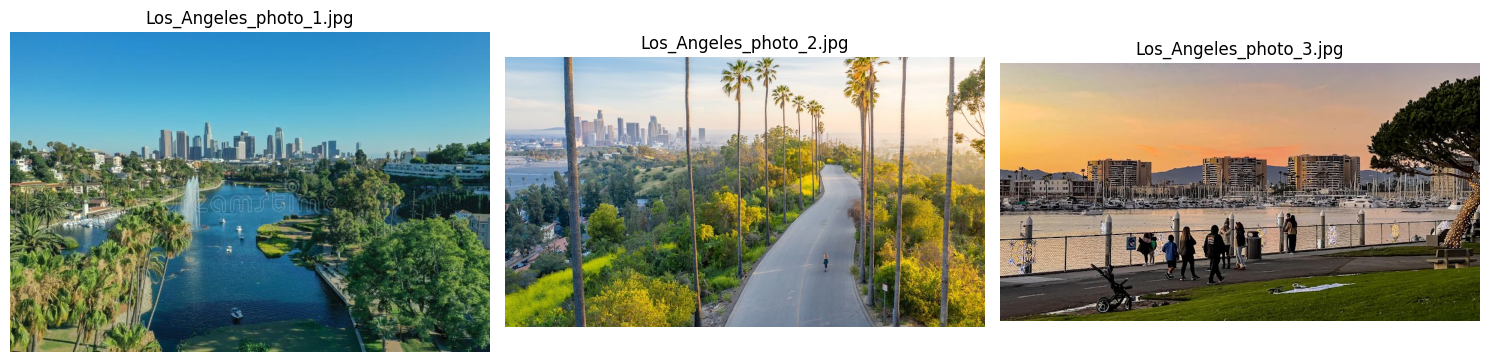

Displaying images for Santa_Monica_Pier:


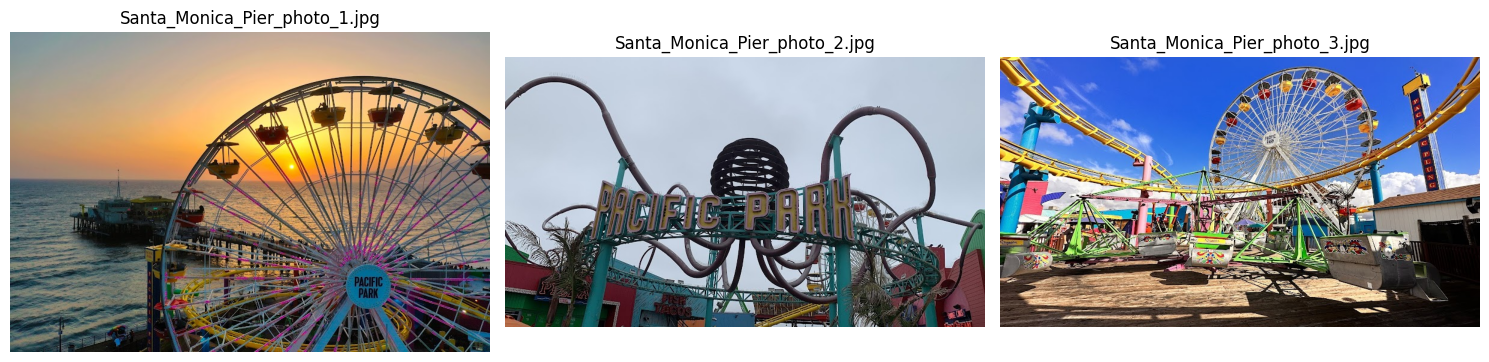

Displaying images for San_Francisco:


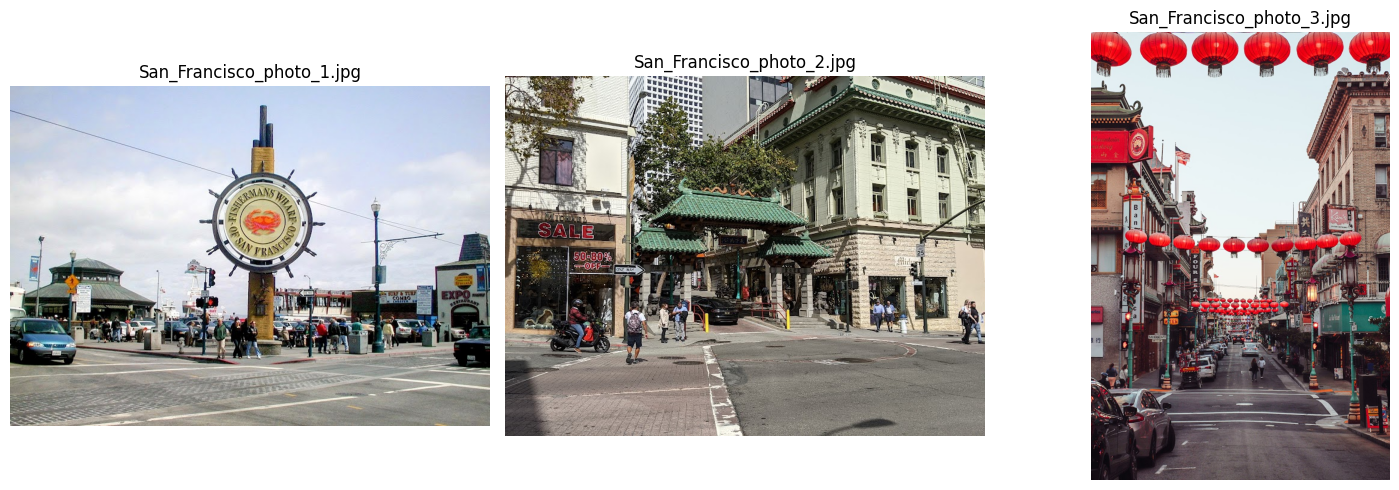

Displaying images for the_Golden_Gate_Bridge:


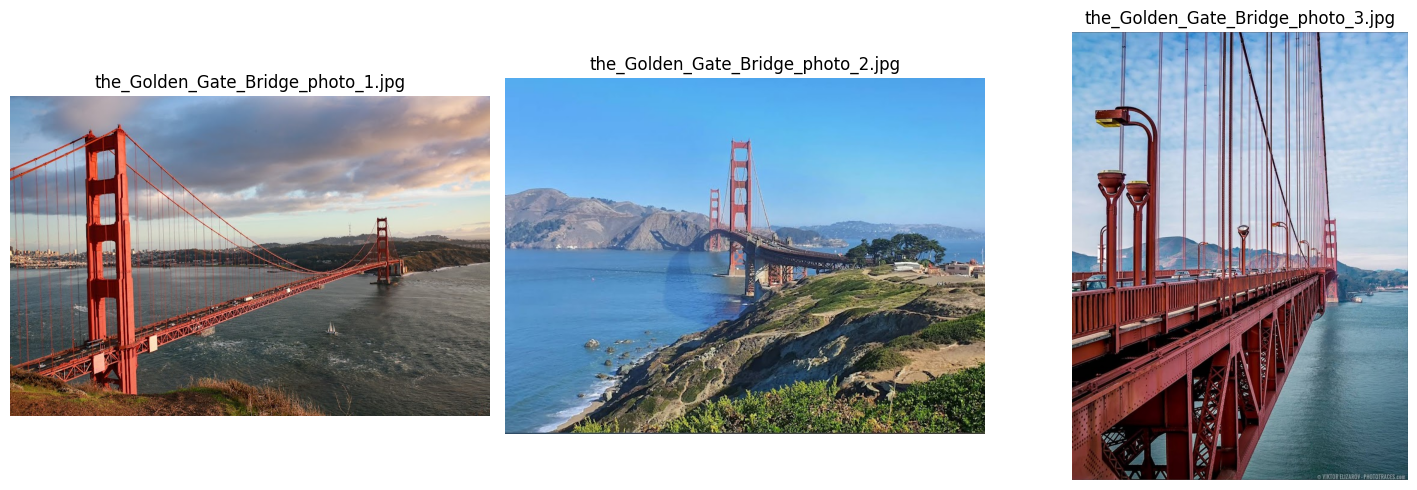

Displaying images for Union_Square:


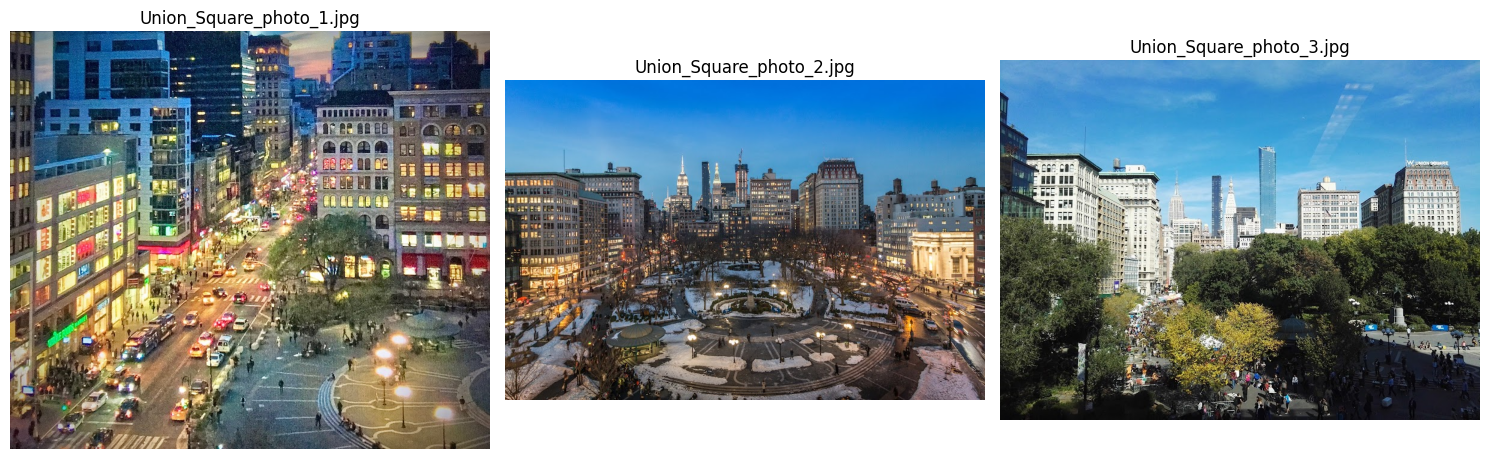

In [13]:
import os
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt

def show_images_grid(city_folder):
    city_names = [city for city in os.listdir(city_folder) if os.path.isdir(os.path.join(city_folder, city))]
    
    for city in city_names:
        city_path = os.path.join(city_folder, city)
        image_files = [img for img in os.listdir(city_path) if img.endswith(".jpg")]
        
        if image_files:
            print(f"Displaying images for {city}:")

            # Prepare grid
            n = len(image_files)
            cols = 3  # Set the number of columns in the grid
            rows = (n // cols) + (n % cols > 0)  # Calculate the number of rows
            
            # Create subplots
            fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
            axes = axes.flatten()  # Flatten to make indexing easier

            for i, img_file in enumerate(image_files):
                img_path = os.path.join(city_path, img_file)
                try:
                    img = Image.open(img_path)
                    axes[i].imshow(img)
                    axes[i].axis('off')  # Hide axes
                    axes[i].set_title(img_file)
                except Exception as e:
                    print(f"Error displaying image {img_file}: {e}")

            # Hide any extra axes if the number of images is less than grid size
            for i in range(n, len(axes)):
                axes[i].axis('off')

            plt.tight_layout()
            plt.show()
        else:
            print(f"No images found for {city}.")

# Example usage
city_folder = 'D:/make_my_trip/TravelContentCrew_Using_CrewAI/src/City_Photos'
show_images_grid(city_folder)
